# 📥 Step 1: Load and Inspect Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('/Users/nishantsingh/Downloads/PROJECTS/Nvidia-Stock-Analysis/data/Nvidia_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


## 🧾 Step 2: Data Overview

In [9]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6637 non-null   datetime64[ns]
 1   Close   6637 non-null   float64       
 2   High    6637 non-null   float64       
 3   Low     6637 non-null   float64       
 4   Open    6637 non-null   float64       
 5   Volume  6637 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 311.2 KB


In [11]:
# Summary statistics
df.describe()

,Date,Close,High,Low,Open,Volume
count,6637,6637.000000,6637.000000,6637.000000,6637.000000,6.637000e+03
mean,2012-03-30 16:38:28.512882176,10.091263,10.279293,9.885371,10.091765,5.952182e+08
min,1999-01-22 00:00:00,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,2005-08-26 00:00:00,0.259741,0.266981,0.251946,0.259053,3.333360e+08
50%,2012-03-29 00:00:00,0.440848,0.447144,0.434353,0.440676,4.961320e+08
75%,2018-10-31 00:00:00,4.888134,4.957336,4.810735,4.895365,7.269720e+08
max,2025-06-10 00:00:00,149.416245,153.115916,147.806407,153.015919,9.230856e+09
std,NaN,26.686641,27.192558,26.140134,26.706411,4.297521e+08


## 🧮 Step 3: Feature Engineering

In [13]:
# Create additional features
df['Daily Range'] = df['High'] - df['Low']
df['Price Change %'] = (df['Close'] - df['Open']) / df['Open'] * 100
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()
df['Volatility_30'] = df['Close'].rolling(window=30).std()
df.head()

,Date,Close,High,Low,Open,Volume,Daily Range,Price Change %,MA_7,MA_30,MA_90,Volatility_30
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000,0.009194,-6.249138,NaN,NaN,NaN,NaN
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000,0.004417,2.353687,NaN,NaN,NaN,NaN
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000,0.005134,-8.805878,NaN,NaN,NaN,NaN
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000,0.003105,-0.620124,NaN,NaN,NaN,NaN
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000,0.000597,-0.314397,NaN,NaN,NaN,NaN


## 📊 Step 4: Exploratory Data Analysis

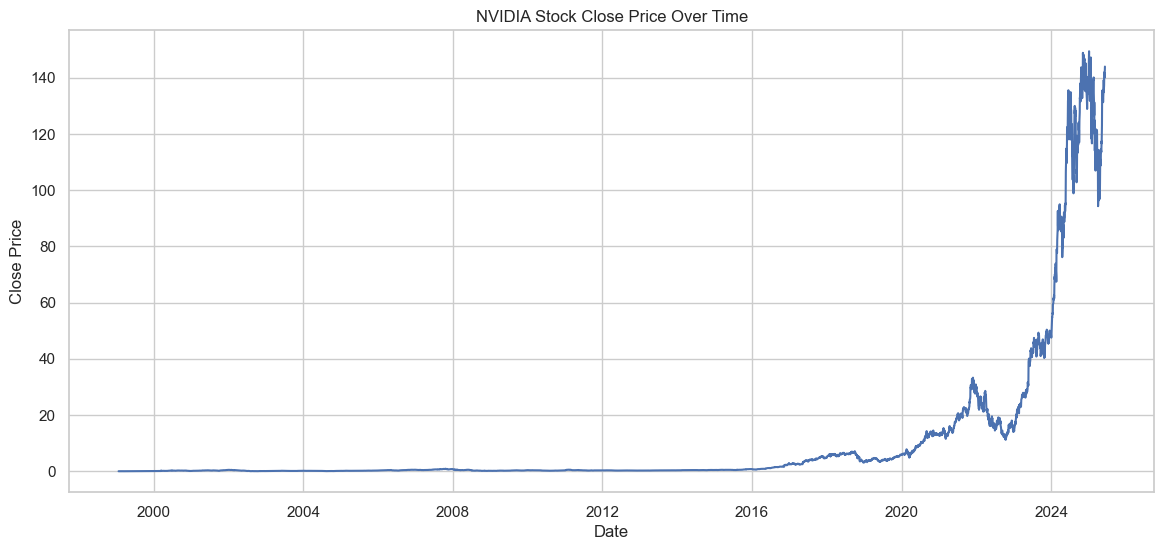

In [15]:
# Close price trend
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'])
plt.title('NVIDIA Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

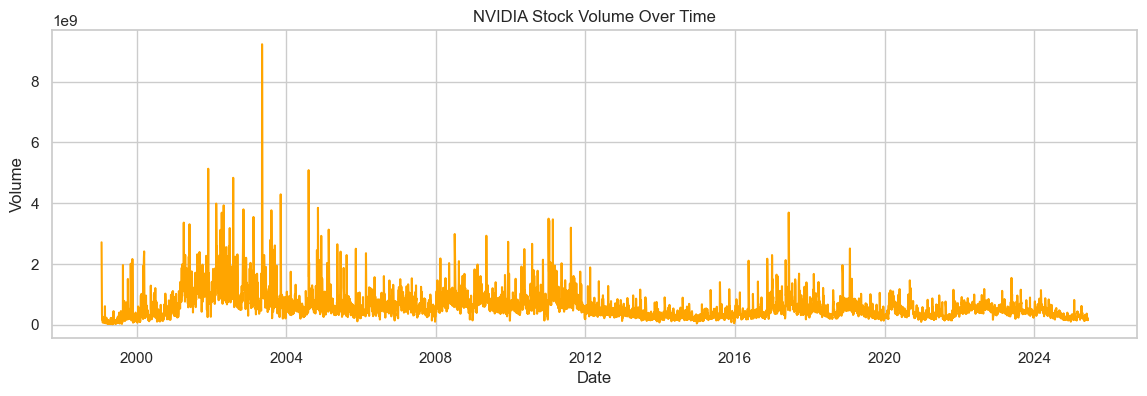

In [17]:
# Volume trend
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('NVIDIA Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

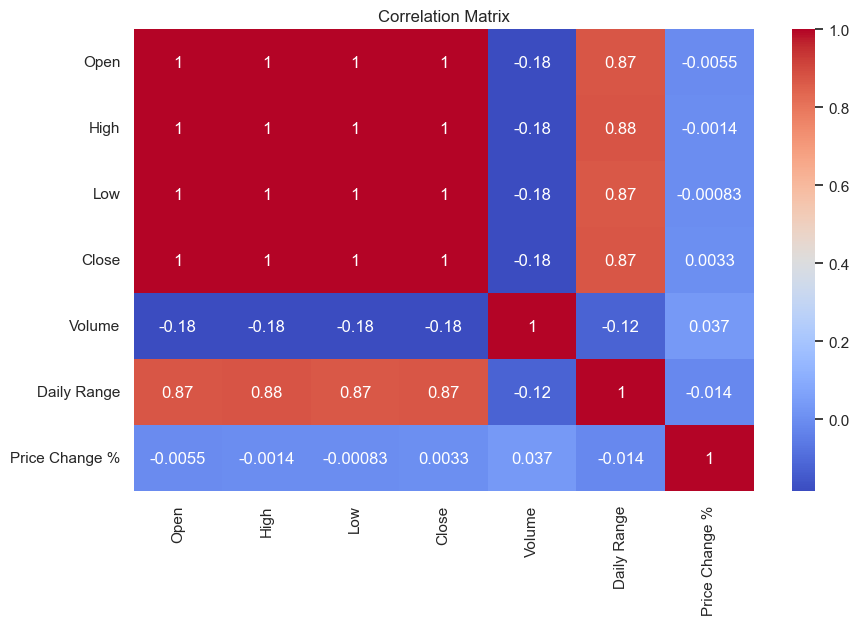

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range', 'Price Change %']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 📈 Step 5: Trend & Seasonality Analysis

/var/folders/c5/bw9q2hv17x5bctttcz0cl1ww0000gn/T/ipykernel_54186/3199865414.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='Date').mean()


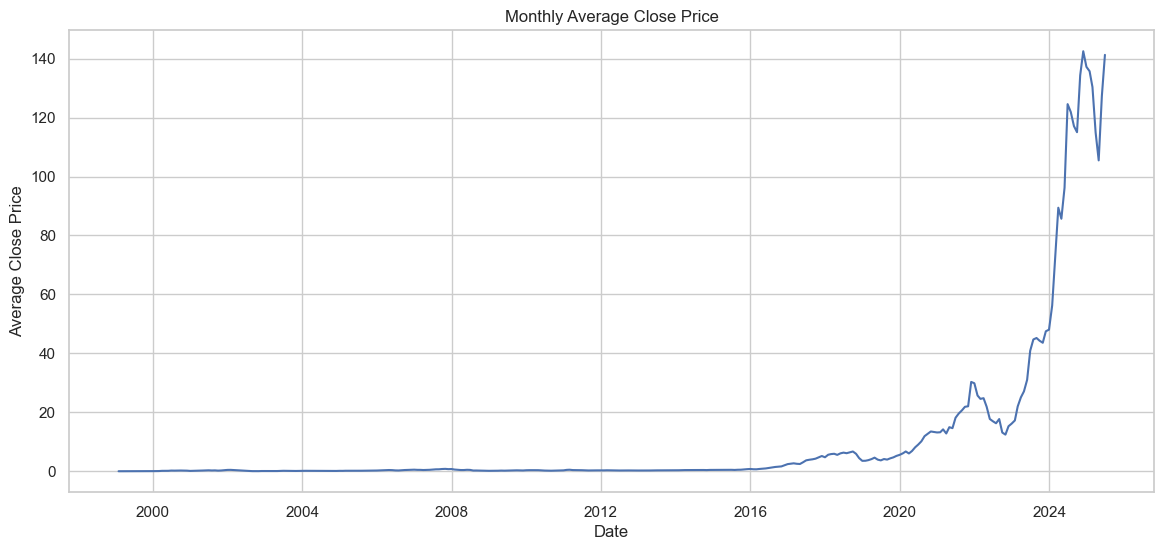

In [21]:
# Monthly average closing prices
monthly = df.resample('M', on='Date').mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly.index, monthly['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()

/var/folders/c5/bw9q2hv17x5bctttcz0cl1ww0000gn/T/ipykernel_54186/737253378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_return.index, y=yearly_return.values, palette="viridis")


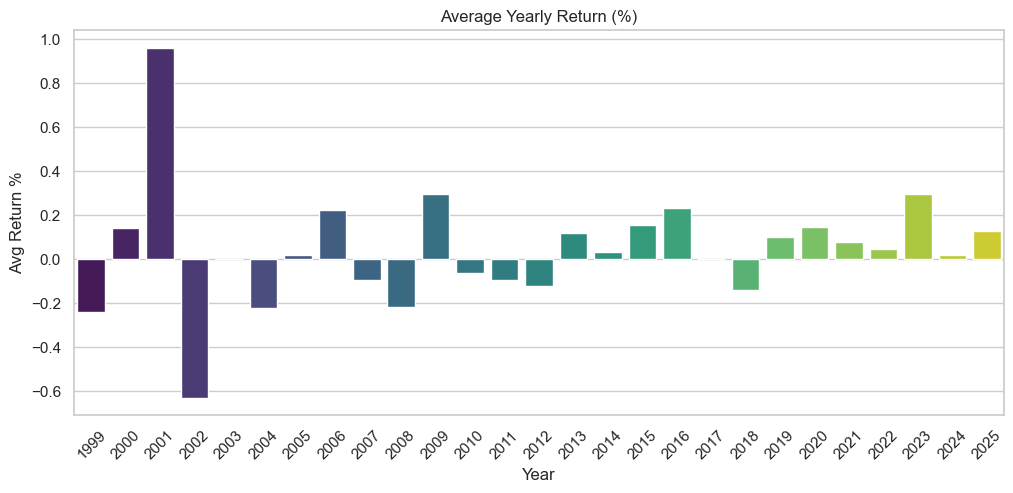

In [23]:
# Yearly average returns
df['Year'] = df['Date'].dt.year
yearly_return = df.groupby('Year')['Price Change %'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=yearly_return.index, y=yearly_return.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Average Yearly Return (%)')
plt.xlabel('Year')
plt.ylabel('Avg Return %')
plt.show()

## 🔍 Step 6: Key Insights

In [25]:
print("Highest Closing Price:", df['Close'].max())
print("Lowest Closing Price:", df['Close'].min())
print("Biggest 1-Day Gain (%):", df['Price Change %'].max())
print("Biggest 1-Day Drop (%):", df['Price Change %'].min())

Highest Closing Price: 149.41624450683594
Lowest Closing Price: 0.0312834903597831
Biggest 1-Day Gain (%): 39.485993943597954
Biggest 1-Day Drop (%): -25.810602570799123
